### jupyter notebook
### vscode
### environment

In [ ]:
import nltk
import pandas as pd
from bs4 import BeautifulSoup
import string
import re
import timeit
%matplotlib inline
from IPython.display import Image
import spacy


In [3]:
print(['Monty', 'Python'] * 2, end = '')

['Monty', 'Python', 'Monty', 'Python']

In [4]:
my_string = "Dersimizin ilk kodlarını yazıyoruz 'Hello World'"

my_string

"Dersimizin ilk kodlarını yazıyoruz 'Hello World'"

In [5]:
my_string * 3

"Dersimizin ilk kodlarını yazıyoruz 'Hello World'Dersimizin ilk kodlarını yazıyoruz 'Hello World'Dersimizin ilk kodlarını yazıyoruz 'Hello World'"

In [6]:
print((my_string + " ") * 3)

Dersimizin ilk kodlarını yazıyoruz 'Hello World' Dersimizin ilk kodlarını yazıyoruz 'Hello World' Dersimizin ilk kodlarını yazıyoruz 'Hello World' 


In [7]:
print(' '.join([my_string] * 3))

Dersimizin ilk kodlarını yazıyoruz 'Hello World' Dersimizin ilk kodlarını yazıyoruz 'Hello World' Dersimizin ilk kodlarını yazıyoruz 'Hello World'


In [8]:
my_sent = ["Öğrenecek", "o", "kadar", "fazla", "şey", "var", "ki", "hiç", 
           "uyumasam", "5 e bölünsem", "ve", "çalışsam", "yine","de","yetmez"]

my_string = ' '.join(my_sent)
my_string

'Öğrenecek o kadar fazla şey var ki hiç uyumasam 5 e bölünsem ve çalışsam yine de yetmez'

In [9]:
print(my_string.split(), end = ' ')

['Öğrenecek', 'o', 'kadar', 'fazla', 'şey', 'var', 'ki', 'hiç', 'uyumasam', '5', 'e', 'bölünsem', 've', 'çalışsam', 'yine', 'de', 'yetmez'] 

In [10]:
it_data = pd.read_csv('../../Data/Jobs_IT.csv')
it_data.head()

,JobRefNo,DigerPozisyon,Qualifications,Classification
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri
3,3463995,Full Stack Developer,<p>Yeditek Yeni Dijital Teknolojiler A.Ş.</p><...,Bilgi Teknolojileri
4,3463739,Multimedya Tasarım Uzmanı,<p>Türkiye'de eğitim teknolojileri alanının il...,Bilgi Teknolojileri


In [11]:
soup = BeautifulSoup(it_data.iloc[2]['Qualifications'])
text = soup.get_text(" ")
print(text)
print(len(text))

Şartlar 08.30 - 18.30 arası mesai saatleri. Sadece pazar günleri çalışmıyoruz. Yerimiz Kızılay- Kolejdedir. Nitelikler Orta seviye Photoshop (Zorunlu) Tercihen Adobe premier bilen Tercihen orta seviye İngilizce okuma ve yazma Tercihen ürün çekimi konusunda tecrübeli. İşin Tanımı Grafik tasarımın yanı sıra İdari işlerde yardımcı olacak ekip arkadaşı ihtiyacımız vardır.  Siparişleri  ayarlama, kargo paketleme, baskı makinalarının kullanımı gibi gün içinde bizler ne yapıyorsak yardımcı olacak personel işe alınacaktır. Ara sıra Adobe premier ve photoshopta projeler verilecektir bu nedenle bilen kişileri tercih ediyoruz.
623


In [12]:
phrase1 = BeautifulSoup(it_data.iloc[2]['Qualifications']).get_text(" ").split()[0:4]
phrase2 = BeautifulSoup(it_data.iloc[2]['Qualifications']).get_text(" ").split()[4:8]

print(' '.join(phrase1 + phrase2))

Şartlar 08.30 - 18.30 arası mesai saatleri. Sadece


In [13]:
len(phrase1 + phrase2)

8

In [23]:
phrase1[-2:]

['-', '18.30']

In [14]:
"Monty Python"[6:12]

'Python'

In [15]:
["Monty", "Python"][1]

'Python'

In [16]:
phrase1[0][2]

'r'

In [17]:
(phrase1 + phrase2)[-2][-2]

'i'

In [22]:
print(phrase1[0][2].upper())
print(phrase1[0][2].lower())
print(phrase1[0][2].isupper())
print(phrase1[0][2].islower())

R
r
False
True


In [29]:
[w for w in text.split() if len(w) == 4]

['Orta', 'orta', 'ürün', 'İşin', 'yanı', 'sıra', 'ekip', 'gibi', 'sıra']

In [26]:
text

'Şartlar 08.30 - 18.30 arası mesai saatleri. Sadece pazar günleri çalışmıyoruz. Yerimiz Kızılay- Kolejdedir. Nitelikler Orta seviye Photoshop (Zorunlu) Tercihen Adobe premier bilen Tercihen orta seviye İngilizce okuma ve yazma Tercihen ürün çekimi konusunda tecrübeli. İşin Tanımı Grafik tasarımın yanı sıra İdari işlerde yardımcı olacak ekip arkadaşı ihtiyacımız vardır.\xa0 Siparişleri \xa0ayarlama, kargo paketleme, baskı makinalarının kullanımı gibi gün içinde bizler ne yapıyorsak yardımcı olacak personel işe alınacaktır. Ara sıra Adobe premier ve photoshopta projeler verilecektir bu nedenle bilen kişileri tercih ediyoruz.'

In [31]:
nltk.FreqDist(text.split()).most_common(5)

[('Tercihen', 3), ('seviye', 2), ('Adobe', 2), ('premier', 2), ('bilen', 2)]

In [38]:
four_letter_fd = nltk.FreqDist(w.lower() for w in text.split()) #if len(w) == 1)
print(four_letter_fd.most_common(100), end = '')

[('tercihen', 3), ('orta', 2), ('seviye', 2), ('adobe', 2), ('premier', 2), ('bilen', 2), ('ve', 2), ('sıra', 2), ('yardımcı', 2), ('olacak', 2), ('şartlar', 1), ('08.30', 1), ('-', 1), ('18.30', 1), ('arası', 1), ('mesai', 1), ('saatleri.', 1), ('sadece', 1), ('pazar', 1), ('günleri', 1), ('çalışmıyoruz.', 1), ('yerimiz', 1), ('kızılay-', 1), ('kolejdedir.', 1), ('nitelikler', 1), ('photoshop', 1), ('(zorunlu)', 1), ('i̇ngilizce', 1), ('okuma', 1), ('yazma', 1), ('ürün', 1), ('çekimi', 1), ('konusunda', 1), ('tecrübeli.', 1), ('i̇şin', 1), ('tanımı', 1), ('grafik', 1), ('tasarımın', 1), ('yanı', 1), ('i̇dari', 1), ('işlerde', 1), ('ekip', 1), ('arkadaşı', 1), ('ihtiyacımız', 1), ('vardır.', 1), ('siparişleri', 1), ('ayarlama,', 1), ('kargo', 1), ('paketleme,', 1), ('baskı', 1), ('makinalarının', 1), ('kullanımı', 1), ('gibi', 1), ('gün', 1), ('içinde', 1), ('bizler', 1), ('ne', 1), ('yapıyorsak', 1), ('personel', 1), ('işe', 1), ('alınacaktır.', 1), ('ara', 1), ('photoshopta', 1), ('p

In [42]:
fullText = ''

for i in range(len(it_data)):
    if i>1:
        fullText += BeautifulSoup(it_data.iloc[i]['Qualifications']).get_text(" ") + ' '

fullText[0:500]

'Şartlar 08.30 - 18.30 arası mesai saatleri. Sadece pazar günleri çalışmıyoruz. Yerimiz Kızılay- Kolejdedir. Nitelikler Orta seviye Photoshop (Zorunlu) Tercihen Adobe premier bilen Tercihen orta seviye İngilizce okuma ve yazma Tercihen ürün çekimi konusunda tecrübeli. İşin Tanımı Grafik tasarımın yanı sıra İdari işlerde yardımcı olacak ekip arkadaşı ihtiyacımız vardır.\xa0 Siparişleri \xa0ayarlama, kargo paketleme, baskı makinalarının kullanımı gibi gün içinde bizler ne yapıyorsak yardımcı olacak perso'

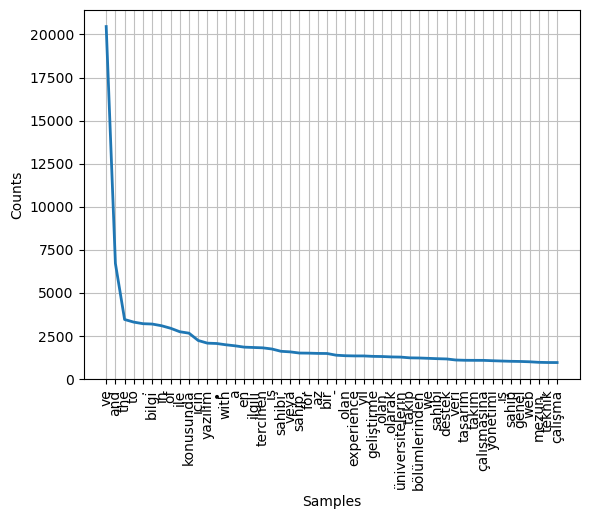

In [44]:
four_letter_fd = nltk.FreqDist(w.lower() for w in fullText.split()) #if len(w) == 1)
four_letter_fd.plot(50);


|       Method      |                            Functionality                            |
|:------------------|:--------------------------------------------------------------------|
| `s.find(t)`       | index of first instance of   string `t` inside `s` (`-1` if not found)    |
| `s.rfind(t)`      | index of last instance of   string `t` inside `s` (`-1` if not found)     |
| `s.index(t)`      | like `s.find(t)` except it raises `ValueError` if not   found           |
| `s.rindex(t)`     | like `s.rfind(t)` except it raises `ValueError` if not   found          |
| `s.join(text)`    | combine the words of the text into a string using `s` as the glue     |
| `s.split(t)`      | split `s` into a list wherever a `t` is found (whitespace   by default) |
| `s.splitlines()`  | split `s` into a list of strings, one per line                        |
| `s.lower()`       | a lowercased version of the string `s`                                |
| `s.upper()`       | an uppercased version of the string `s`                               |
| `s.title()`       | a titlecased version of the string `s`                                |
| `s.strip()`       | a copy of `s` without leading or trailing whitespace                  |
| `s.replace(t, u)` | replace instances of `t` with `u` inside `s`                              |


In [45]:
tot_chars = sum(len(w) for w in fullText.split())

print("Total number of characters: {}".format(tot_chars))

Total number of characters: 3323709


In [48]:
# Average word length
sum(len(w) for w in fullText.split())/len(fullText.split())

6.831443422926802

In [49]:
tot_na_chars = sum(len(w) for w in fullText.split() if not w.isalnum())
perc_na_chars = tot_na_chars/tot_chars

print("Total number of non-alphanumeric characters: {}".format(tot_na_chars))
print("Percentage of non-alphanumeric characters: {:%}".format(perc_na_chars))

Total number of non-alphanumeric characters: 749016
Percentage of non-alphanumeric characters: 22.535547%


In [52]:
[w for w in fullText.split() if not w.isalnum()]

['08.30',
 '-',
 '18.30',
 'saatleri.',
 'çalışmıyoruz.',
 'Kızılay-',
 'Kolejdedir.',
 '(Zorunlu)',
 'tecrübeli.',
 'vardır.',
 'ayarlama,',
 'paketleme,',
 'alınacaktır.',
 'ediyoruz.',
 'A.Ş.',
 'Yeditek,',
 'göstermektedir.',
 'çalışıyoruz.',
 'problemler;',
 'edilir,',
 'sunulur.',
 'ilanıdır.',
 "Türkiye'de",
 ',',
 'kurumlarda,',
 'sağlayan,',
 'sunar.',
 'sonuçları,',
 'mümkün.',
 'teknolojileri,',
 'anlayışıyla,',
 'Türkiye’nin',
 'sağlamaktadır.',
 '500’e',
 "Uzmanı'",
 'arıyoruz.',
 '•',
 'Tasarımı,',
 'Tasarımı,',
 'TV,',
 'Fakültesi,',
 'mezun,',
 '•',
 'türleri,',
 'sahibi,',
 '•',
 'bilen,',
 'Photoshop,',
 'sahibi,',
 '•',
 'sahibi,',
 '•',
 'sahibi,',
 '•',
 'Kurgu,',
 'ses,',
 'eden,',
 '•',
 'kuvvetli,',
 '•',
 'Tipografi,',
 'sahip,',
 '•',
 'sunabilecek,',
 '•',
 'veren,',
 'açık,',
 'odaklı,',
 'geliştirebilen,',
 '•',
 'sağlayabilecek,',
 '•',
 '•',
 'gerçekleştirilmesi,',
 '•',
 'gerçekleştirilmesi,',
 '•',
 'E-eğitimlerin',
 'yapılması,',
 '•',
 ',',
 'eğitimi,

### what do we lose with whitespace tokenization?

# Punctuation

• We typically don’t want to just strip all punctuation, however.    
• Punctuation signals boundaries (sentence, clausal boundaries, parentheticals, asides)  
• Some punctuation has illocutionary force, like exclamation points (!) and question marks (?)  
• Emoticons are strong signals of e.g. sentiment  

# Regular expressions

### A language for specifying search strings in text.

In [66]:
re.findall(r"[Tt]he", "The dog barked at the cat")

['The', 'the']

In [67]:
s = 'GeeksforGeeks: A computer science portal for geeks'
 
match = re.search(r'portal', s)
 
print('Start Index:', match.start())
print('End Index:', match.end())

Start Index: 34
End Index: 40


In [69]:
# A sample text string where regular expression
# is searched.
string = """Hello my Number is 123456789 and
            my friend's number is 987654321"""
 
# A sample regular expression to find digits.
regex = '\d+'
 
match = re.findall(regex, string)
print(match)

['123456789', '987654321']


In [70]:
# \d is equivalent to [0-9].
p = re.compile('\d')
print(p.findall("I went to him at 11 A.M. on 4th July 1886"))
 
# \d+ will match a group on [0-9], group
# of one or greater size
p = re.compile('\d+')
print(p.findall("I went to him at 11 A.M. on 4th July 1886"))

['1', '1', '4', '1', '8', '8', '6']
['11', '4', '1886']


In [71]:
# \w is equivalent to [a-zA-Z0-9_].
p = re.compile('\w')
print(p.findall("He said * in some_lang."))
 
# \w+ matches to group of alphanumeric character.
p = re.compile('\w+')
print(p.findall("I went to him at 11 A.M., he \
said *** in some_language."))
 
# \W matches to non alphanumeric characters.
p = re.compile('\W')
print(p.findall("he said *** in some_language."))

['H', 'e', 's', 'a', 'i', 'd', 'i', 'n', 's', 'o', 'm', 'e', '_', 'l', 'a', 'n', 'g']
['I', 'went', 'to', 'him', 'at', '11', 'A', 'M', 'he', 'said', 'in', 'some_language']
[' ', ' ', '*', '*', '*', ' ', ' ', '.']


### Uğraşmaya gerek var mı?

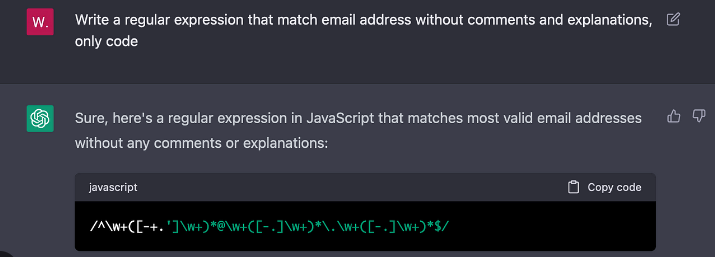

In [77]:
Image('../../Images/regexExampleChatGPT.png')


In [82]:
from nltk.tokenize import sent_tokenize
text = "God is Great! I won a lottery."
print(sent_tokenize(text))

['God is Great!', 'I won a lottery.']


In [83]:
text = "Bir de başka bir cümle, daha yazmak istiyorum. Bakalım burada neler olacak? Sence de çok heyecanlı değil mi? Evet, çok heyecanlı. Çünkü bu bir deneme."
print(sent_tokenize(text))

['Bir de başka bir cümle, daha yazmak istiyorum.', 'Bakalım burada neler olacak?', 'Sence de çok heyecanlı değil mi?', 'Evet, çok heyecanlı.', 'Çünkü bu bir deneme.']


# Stemming and lemmatization

• Many languages have some inflectional and derivational morphology, where similar words have similar forms:  organizes, organized, organizing  
• Stemming and lemmatization reduce this variety to a single common base form.

organizes, organized, organizing → organ

In [88]:
from TurkishStemmer import TurkishStemmer
stemmer = TurkishStemmer()
stemmer.stem("okuldakilerden")


'okul'

In [91]:
df = [
    ['musteri', 'hizmetlerine', 'cabuk', 'baglaniyorum'],
    ['konuda', 'yardımcı', 'oluyorlar', 'islemlerimde']
]
turkStem = TurkishStemmer()
all_stem_lists = []

for word_group in df:
    output_stems = []
    for word in word_group:
        stem = turkStem.stem(word)
        output_stems.append(stem)
    all_stem_lists.append(output_stems)

print(all_stem_lists)

[['muster', 'hizmet', 'cabuk', 'baglaniyor'], ['konu', 'yardımç', 'oluyor', 'islem']]


# lemmatization
organizes, organized, organizing → organize


In [98]:
nlp = spacy.load('en_core_web_sm')
text='I went to him at 11 A.M. on 4th July 1886. I was hoping to get a response by now. I was hoping to get a response by now. Even though the weather was bad, I went to the gym.'
lemmas=[token.lemma_ for token in nlp(text)]
lemmas

['I',
 'go',
 'to',
 'he',
 'at',
 '11',
 'A.M.',
 'on',
 '4th',
 'July',
 '1886',
 '.',
 'I',
 'be',
 'hope',
 'to',
 'get',
 'a',
 'response',
 'by',
 'now',
 '.',
 'I',
 'be',
 'hope',
 'to',
 'get',
 'a',
 'response',
 'by',
 'now',
 '.',
 'even',
 'though',
 'the',
 'weather',
 'be',
 'bad',
 ',',
 'I',
 'go',
 'to',
 'the',
 'gym',
 '.']